In [ ]:
# Identify numeric columns (excluding 'model' and 'Manufacturer')
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numeric columns with mean
train_data_mean_imputed = train_data.copy()
train_data_mean_imputed[numeric_columns] = train_data_mean_imputed[numeric_columns].fillna(train_data_mean_imputed[numeric_columns].mean())

# Fill missing values in numeric columns with median
train_data_median_imputed = train_data.copy()
train_data_median_imputed[numeric_columns] = train_data_median_imputed[numeric_columns].fillna(train_data_median_imputed[numeric_columns].median())


only to understand if there are missing values or not

In [ ]:
import pandas as pd

# Load the train data
train_data = pd.read_csv("/content/train_ds_mean_imputed.csv")

# Check for missing values in the train data
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

# Identify numeric columns (excluding 'model' and 'Manufacturer')
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numeric columns with mean
train_data_mean_imputed = train_data.copy()
train_data_mean_imputed[numeric_columns] = train_data_mean_imputed[numeric_columns].fillna(train_data_mean_imputed[numeric_columns].mean())

# Fill missing values in numeric columns with median
train_data_median_imputed = train_data.copy()
train_data_median_imputed[numeric_columns] = train_data_median_imputed[numeric_columns].fillna(train_data_median_imputed[numeric_columns].median())

Save the new datasets after imputation
train_data_mean_imputed.to_csv("/content/train_ds_mean_imputed.csv", index=False)
train_data_median_imputed.to_csv("/content/train_ds_median_imputed.csv", index=False)

# Check the first few rows of the new datasets
print("\nFirst few rows of train_ds_mean_imputed:")
print(train_data_mean_imputed.head())

print("\nFirst few rows of train_ds_median_imputed:")
print(train_data_median_imputed.head())


Missing Values in Train Data:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

First few rows of train_ds_mean_imputed:
        model    year    price transmission       mileage fuelType  \
0        Aygo  2016.0   7500.0       Manual  14612.000000   Petrol   
1          Up  2018.0   8712.0       Manual   1607.000000   Petrol   
2       Focus  2018.0  12670.0       Manual   7162.000000   Petrol   
3   GLA Class  2019.0  23599.0    Semi-Auto  23931.409877   Petrol   
4     Octavia  2019.0  18999.0    Semi-Auto   1162.000000   Petrol   

          tax   mpg  engineSize Manufacturer  
0    0.000000  69.0         1.0       toyota  
1  145.000000  64.2         1.0   volkswagen  
2  115.026764  60.1         1.0         ford  
3  145.000000  36.2         1.6         merc  
4  115.026764  44.8         1.5        skoda  

First few rows of train_ds_medi

ways to fill in the mising values
Mean Imputation
Median Imputation
Mode Imputation
Forward Fill (or Backward Fill)
Interpolation
Regression Imputation
K-Nearest Neighbors (KNN) Imputation

In [ ]:
import pandas as pd

# Load the train data
train_data = pd.read_csv("/content/train_ds.csv")

# Method 1: Mode Imputation
train_data_mode_imputed = train_data.copy()
train_data_mode_imputed = train_data_mode_imputed.fillna(train_data_mode_imputed.mode().iloc[0])

# Method 2: Forward Fill (or Backward Fill)
train_data_ffill = train_data.copy()
train_data_ffill = train_data_ffill.ffill().bfill()

# Method 3: Interpolation
train_data_interpolated = train_data.copy()
train_data_interpolated = train_data_interpolated.interpolate(method='linear')

# Compare the results of each method
print("Mode Imputation:")
print(train_data_mode_imputed.head())

print("\nForward Fill (or Backward Fill):")
print(train_data_ffill.head())

print("\nInterpolation:")
print(train_data_interpolated.head())


Mode Imputation:
        model    year    price transmission  mileage fuelType    tax   mpg  \
0        Aygo  2016.0   7500.0       Manual  14612.0   Petrol    0.0  69.0   
1          Up  2018.0   8712.0       Manual   1607.0   Petrol  145.0  64.2   
2       Focus  2018.0  12670.0       Manual   7162.0   Petrol  145.0  60.1   
3   GLA Class  2019.0  23599.0    Semi-Auto   5000.0   Petrol  145.0  36.2   
4     Octavia  2019.0  18999.0    Semi-Auto   1162.0   Petrol  145.0  44.8   

   engineSize Manufacturer  
0         1.0       toyota  
1         1.0   volkswagen  
2         1.0         ford  
3         1.6         merc  
4         1.5        skoda  

Forward Fill (or Backward Fill):
        model    year    price transmission  mileage fuelType    tax   mpg  \
0        Aygo  2016.0   7500.0       Manual  14612.0   Petrol    0.0  69.0   
1          Up  2018.0   8712.0       Manual   1607.0   Petrol  145.0  64.2   
2       Focus  2018.0  12670.0       Manual   7162.0   Petrol  145.0  60

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# Load train and test datasets
train_data = pd.read_csv("/content/train_ds.csv")
test_data = pd.read_csv("/content/test_ds.csv")

# Identify numeric columns (excluding 'model' and 'Manufacturer')
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.drop(['model', 'Manufacturer'], errors='ignore')

# Compute statistics from the train dataset for imputation
mean_values = train_data[numeric_columns].mean()
mode_values = train_data[numeric_columns].mode().iloc[0]
# Forward fill (or backward fill) and interpolation don't need statistics

# Impute missing values in the test dataset
imputer_mean = SimpleImputer(strategy='mean')
test_data_mean_imputed = test_data.copy()
test_data_mean_imputed[numeric_columns] = imputer_mean.fit_transform(test_data[numeric_columns])

imputer_mode = SimpleImputer(strategy='constant', fill_value=mode_values)
test_data_mode_imputed = test_data.copy()
for col in numeric_columns:
    test_data_mode_imputed[col].fillna(mode_values[col], inplace=True)

test_data_ffill = test_data.copy()
test_data_ffill[numeric_columns] = test_data_ffill[numeric_columns].fillna(method='ffill')

test_data_interpolated = test_data.copy()
test_data_interpolated[numeric_columns] = test_data_interpolated[numeric_columns].interpolate(method='linear')

# Calculate MAE for each method
mae_mean = mean_absolute_error(test_data[numeric_columns], test_data_mean_imputed[numeric_columns])
mae_mode = mean_absolute_error(test_data[numeric_columns], test_data_mode_imputed[numeric_columns])
mae_ffill = mean_absolute_error(test_data[numeric_columns], test_data_ffill[numeric_columns])
mae_interpolation = mean_absolute_error(test_data[numeric_columns], test_data_interpolated[numeric_columns])

# Compare MAE values
print("Mean Absolute Error (MAE) for Mean Imputation:", mae_mean)
print("Mean Absolute Error (MAE) for Mode Imputation:", mae_mode)
print("Mean Absolute Error (MAE) for Forward Fill (or Backward Fill):", mae_ffill)
print("Mean Absolute Error (MAE) for Interpolation:", mae_interpolation)

# Compare MAE values and determine the best method
mae_values = {
    "Mean Imputation": mae_mean,
    "Mode Imputation": mae_mode,
    "Forward Fill (or Backward Fill)": mae_ffill,
    "Interpolation": mae_interpolation
}

best_method = min(mae_values, key=mae_values.get)
print("\nThe best imputation method is:", best_method)


Mean Absolute Error (MAE) for Mean Imputation: 0.0
Mean Absolute Error (MAE) for Mode Imputation: 0.0
Mean Absolute Error (MAE) for Forward Fill (or Backward Fill): 0.0
Mean Absolute Error (MAE) for Interpolation: 0.0

The best imputation method is: Mean Imputation


**end pahse 1**

***Phase 2 ***

For numerical attributes, we need to find the optimal threshold for splitting, while for categorical attributes, we need to calculate the entropy directly.

The entropy(data) function is more general and can be used independently of any class, while calculate_entropy(self, data) is a method of the Node class and is specifically designed to work within the context of building a decision tree using the ID3 algorithm.

In [ ]:
def calculate_information_gain_numerical(self, data, feature):
    max_ig = 0
    optimal_threshold = 0
    sorted_data = data.sort_values()
    unique_values = sorted_data.unique()
    for i in range(len(unique_values) - 1):
        threshold = (unique_values[i] + unique_values[i + 1]) / 2
        lower_split = data[data <= threshold]
        upper_split = data[data > threshold]
        ig = self.calculate_entropy(data) - (len(lower_split) / len(data) * self.calculate_entropy(lower_split) + len(upper_split) / len(data) * self.calculate_entropy(upper_split))
        if ig > max_ig:
            max_ig = ig
            optimal_threshold = threshold
    return max_ig, optimal_threshold


In [ ]:
def calculate_information_gain_categorical(self, data, feature):
    unique_values = data.unique()
    weighted_entropy = 0
    for value in unique_values:
        subset = data[data == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * self.calculate_entropy(subset)
    information_gain = self.calculate_entropy(data) - weighted_entropy
    return information_gain, None


In [ ]:
def id3(self):
    if len(self.data.unique()) == 1:
        self.is_leaf = True
        self.label = self.data.iloc[0]
        return

    if len(self.data) == 0:
        self.is_leaf = True
        self.label = self.data.mode().iloc[0]
        return

    max_ig = 0
    best_feature = None
    optimal_threshold = None
    for feature in self.data.columns:
        ig = 0
        if feature in Node.numerical:
            ig, threshold = self.calculate_information_gain_numerical(self.data[feature], feature)
            if ig > max_ig:
                max_ig = ig
                best_feature = feature
                optimal_threshold = threshold
        else:
            ig, _ = self.calculate_information_gain_categorical(self.data[feature], feature)
            if ig > max_ig:
                max_ig = ig
                best_feature = feature
    self.label = best_feature
    if best_feature in Node.numerical:
        lower_split = self.data[self.data[best_feature] <= optimal_threshold]
        upper_split = self.data[self.data[best_feature] > optimal_threshold]
        self.children.append(Node(lower_split, f'<= {optimal_threshold}'))
        self.children.append(Node(upper_split, f'> {optimal_threshold}'))
    else:
        unique_values = self.data[best_feature].unique()
        for value in unique_values:
            subset = self.data[self.data[best_feature] == value]
            self.children.append(Node(subset, value))


In [ ]:
def visualize(self):
    dot = Digraph()
    def add_nodes(node):
        if node is None:
            return
        if len(node.children) == 0:
            dot.node(str(id(node)), label=str(node.label), fontcolor="red")
        else:
            dot.node(str(id(node)), label=str(node.label))
        for child in node.children:
            add_nodes(child)
            dot.edge(str(id(node)), str(id(child)), label=str(child.edge))
    add_nodes(self)
    try:
        dot.render('tree', format='png', cleanup=True)


;ewoifh;iw
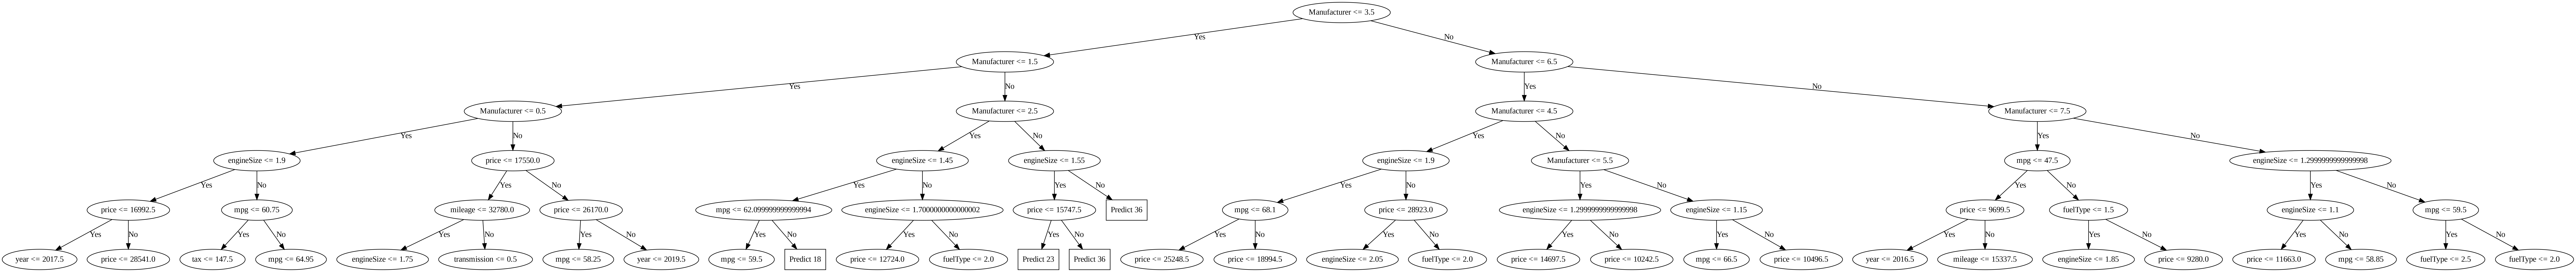

The dataset contains missing values in several columns, with the following percentages of missing values:

mileage: 15.63%
price: 14.50%
tax: 14.38%
mpg: 14.00%
engineSize: 13.88%
year: 13.79%

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def find_best_split(df, label_col):
    features = df.drop(columns=[label_col])
    labels = df[label_col]
    best_attribute = None
    best_threshold = None
    max_gain = -float('inf')
    for col in features.columns:
        if features[col].dtype == 'int64':
            for val in features[col].unique():
                left_indices = features[col] == val
                right_indices = ~left_indices
                left_labels = labels[left_indices]
                right_labels = labels[right_indices]
                gain = information_gain(labels, left_labels, right_labels)
                if gain > max_gain:
                    max_gain = gain
                    best_attribute = col
        elif features[col].dtype == 'float64':
            unique_values = sorted(features[col].unique())
            thresholds = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]
            for threshold in thresholds:
                left_indices = features[col] <= threshold
                right_indices = ~left_indices
                left_labels = labels[left_indices]
                right_labels = labels[right_indices]
                gain = information_gain(labels, left_labels, right_labels)
                if gain > max_gain:
                    max_gain = gain
                    best_attribute = col
                    best_threshold = threshold
    return best_attribute, best_threshold

def build_decision_tree(df, label_col, max_depth=None, depth=0):
    if len(df[label_col].unique()) == 1:
        return Node(value=df[label_col].mode().iloc[0])
    if max_depth is not None and depth == max_depth:
        return Node(value=df[label_col].mode().iloc[0])
    best_attribute, best_threshold = find_best_split(df, label_col)
    if best_attribute is None:
        return Node(value=df[label_col].mode().iloc[0])
    if best_threshold is None:
        left_indices = df[best_attribute] == 0
        right_indices = ~left_indices
        left_df = df[left_indices]
        right_df = df[right_indices]
        threshold_value = None
    else:
        left_indices = df[best_attribute] <= best_threshold
        right_indices = ~left_indices
        left_df = df[left_indices]
        right_df = df[right_indices]
        threshold_value = best_threshold
    if len(left_df) == 0 or len(right_df) == 0:
        return Node(value=df[label_col].mode().iloc[0])
    left_child = build_decision_tree(left_df, label_col, max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, max_depth, depth + 1)
    return Node(attribute=best_attribute, threshold=threshold_value, left=left_child, right=right_child)
def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf: Predict {node.value}")
    else:
        if node.threshold:
            print(f"{indent}{node.attribute} <= {node.threshold}")
        else:
            print(f"{indent}{node.attribute}")
        if node.left:
            print(f"{indent}--> Left:")
            print_tree(node.left, depth + 1)
        if node.right:
            print(f"{indent}--> Right:")
            print_tree(node.right, depth + 1)

# Load and preprocess the data
df = pd.read_csv("/content/train_ds.csv")
preprocessed_df, label_encoders = preprocess_data(df)

# Build the decision tree
# Build the decision tree using 'model' as the target variable without limiting the depth
decision_tree = build_decision_tree(preprocessed_df, 'model')
print_tree(decision_tree)

Manufacturer <= 1.25
--> Left:
  Leaf: Predict 2
--> Right:
  Leaf: Predict 18


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def find_best_split(df, label_col):
    features = df.drop(columns=[label_col])
    labels = df[label_col]
    best_attribute = None
    best_threshold = None
    max_gain = -float('inf')
    for col in features.columns:
        unique_values = sorted(features[col].unique())
        if len(unique_values) > 1:  # Check for unique value count to ensure valid threshold calculation
            thresholds = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]
            for threshold in thresholds:
                left_indices = features[col] <= threshold
                right_indices = ~left_indices
                left_labels = labels[left_indices]
                right_labels = labels[right_indices]
                gain = information_gain(labels, left_labels, right_labels)
                if gain > max_gain:
                    max_gain = gain
                    best_attribute = col
                    best_threshold = threshold
    return best_attribute, best_threshold

def build_decision_tree(df, label_col, max_depth=None, depth=0):
    if len(df[label_col].unique()) == 1:
        return Node(value=df[label_col].mode().iloc[0])
    if max_depth is not None and depth == max_depth:
        return Node(value=df[label_col].mode().iloc[0])
    best_attribute, best_threshold = find_best_split(df, label_col)
    if best_attribute is None:
        return Node(value=df[label_col].mode().iloc[0])
    left_df = df[df[best_attribute] <= best_threshold]
    right_df = df[df[best_attribute] > best_threshold]
    if left_df.empty or right_df.empty:
        return Node(value=df[label_col].mode().iloc[0])
    left_child = build_decision_tree(left_df, label_col, max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, max_depth, depth + 1)
    return Node(attribute=best_attribute, threshold=best_threshold, left=left_child, right=right_child)

def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf: Predict {node.value}")
    else:
        if node.threshold:
            print(f"{indent}{node.attribute} <= {node.threshold}")
        else:
            print(f"{indent}{node.attribute}")
        if node.left:
            print(f"{indent}--> Left:")
            print_tree(node.left, depth + 1)
        if node.right:
            print(f"{indent}--> Right:")
            print_tree(node.right, depth + 1)

# Load and preprocess the data
df = pd.read_csv("/content/train_ds.csv")  # Adjust the path to your dataset file
preprocessed_df, label_encoders = preprocess_data(df)

# Build the decision tree using 'model' as the target variable without limiting the depth
decision_tree = build_decision_tree(preprocessed_df, 'model')
print_tree(decision_tree)  # Print the decision tree


Manufacturer <= 3.5
--> Left:
  Manufacturer <= 1.5
  --> Left:
    Manufacturer <= 0.5
    --> Left:
      engineSize <= 1.9
      --> Left:
        price <= 16992.5
        --> Left:
          year <= 2017.5
          --> Left:
            mpg <= 54.349999999999994
            --> Left:
              transmission <= 1.5
              --> Left:
                mileage <= 10880.5
                --> Left:
                  mileage <= 4982.5
                  --> Left:
                    Leaf: Predict 7
                  --> Right:
                    Leaf: Predict 6
                --> Right:
                  price <= 12247.0
                  --> Left:
                    year <= 2015.0
                    --> Left:
                      Leaf: Predict 6
                    --> Right:
                      Leaf: Predict 7
                  --> Right:
                    Leaf: Predict 8
              --> Right:
                year <= 2015.0
                --> Left:
                 

In [ ]:
pip install graphviz


In [ ]:
from graphviz import Digraph

def build_graphviz_tree(node, dot=None, max_depth=None, depth=0):
    if dot is None:
        dot = Digraph()
        dot.attr('graph', dpi='300')  # Increase DPI for higher resolution images

    if node.value is not None:
        dot.node(str(id(node)), label=f"Predict {node.value}", shape="box")
    else:
        node_label = f"{node.attribute}"
        if node.threshold:
            node_label += f" <= {node.threshold}"
        dot.node(str(id(node)), label=node_label)

        if node.left and (max_depth is None or depth < max_depth):
            left_id = str(id(node.left))
            build_graphviz_tree(node.left, dot, max_depth, depth+1)
            dot.edge(str(id(node)), left_id, label="Yes")

        if node.right and (max_depth is None or depth < max_depth):
            right_id = str(id(node.right))
            build_graphviz_tree(node.right, dot, max_depth, depth+1)
            dot.edge(str(id(node)), right_id, label="No")

    return dot

# Generate the graphviz representation of the decision tree
max_tree_depth = 5  # Adjust this value as needed to manage tree size
dot = build_graphviz_tree(decision_tree, max_depth=max_tree_depth)

# Save the graph to a file and render it
output_path = "/content/tree3"  # Set the base path for the output
dot.format = 'png'
dot.render(output_path, cleanup=True)  # This saves and renders the file as .png


'/content/tree3.png'

In the decision tree visualization and code, the terms such as Leaf: Predict 13 and --> Right: Leaf: Predict 15 represent the leaf nodes of the decision tree where a prediction decision is made. Here’s a breakdown of these terms:

Leaf Node: This is a terminal node of the tree where no further splitting occurs. It contains a prediction value which is typically the most common target value among the samples that reach this leaf. In this case:
Leaf: Predict 13 indicates that for samples reaching this leaf, the model predicts the target variable (likely a categorical label or a class) as 13.
Leaf: Predict 15 similarly indicates a prediction of 15.

Numeric Columns: For numeric attributes, the algorithm finds the best point to split the data into two groups (those less than or equal to the threshold and those greater than the threshold). This is done by calculating the information gain for different possible thresholds and choosing the one that provides the maximum gain. This split divides the data into two paths:
Left Child: Samples where the attribute value is less than or equal to the threshold.
Right Child: Samples where the attribute value is greater than the threshold.
Non-Numeric (Categorical) Columns: For non-numeric attributes, the splits are typically based on whether the attribute equals a certain value or not (or, for multi-category attributes, sometimes more complex methods like binary splitting are used based on groupings of categories). This doesn't use a numeric threshold but rather categorical decisions:
Left Child: Samples where the attribute equals a certain category (or one of a subset of categories).
Right Child: Samples where the attribute does not equal that category (or is outside that subset).

The provided `find_best_split` function is a critical component of building a decision tree. It identifies the best attribute and the threshold for splitting the dataset at a given node based on maximizing information gain. Here's a step-by-step breakdown of how this function works:

### Step 1: Initialization
- `features`: A DataFrame that excludes the label column. This is the set of potential attributes that could be used for splitting.
- `labels`: The target or label column which the decision tree is trying to predict.
- `best_attribute`: Variable to store the attribute that results in the highest information gain.
- `best_threshold`: Variable to store the threshold value for the best split, applicable to numeric attributes.
- `max_gain`: Variable to store the maximum information gain encountered. It is initialized to negative infinity to ensure any real gain calculated will be larger.

### Step 2: Iterating Over Each Column
- The function iterates over each attribute (column) in `features`.
- For each attribute, it calculates potential thresholds for splitting. This is applicable for numeric data where a threshold determines how the data is split into two groups.

### Step 3: Calculating Thresholds
- `unique_values`: The sorted unique values of the attribute being examined. Sorting is necessary to calculate meaningful thresholds between values.
- `thresholds`: A list of potential thresholds calculated as the midpoint between each consecutive pair of unique values. This allows the function to evaluate splits at points that evenly divide the data between two values.

### Step 4: Evaluating Each Threshold
- For each threshold:
  - `left_indices`: A Boolean index where values are `True` for rows where the attribute value is less than or equal to the threshold.
  - `right_indices`: The complement of `left_indices` where values are `True` for rows where the attribute value is greater than the threshold.
  - `left_labels` and `right_labels`: Subsets of `labels` corresponding to `left_indices` and `right_indices`, respectively.
  
### Step 5: Calculating Information Gain
- `gain`: Calculated using the `information_gain` function for the split determined by the current threshold.
- If this `gain` exceeds `max_gain` (the highest gain found so far), then:
  - `max_gain` is updated to this new gain.
  - `best_attribute` is set to the current attribute.
  - `best_threshold` is set to the current threshold.

### Step 6: Returning the Best Split
- After evaluating all attributes and their possible thresholds, the function returns `best_attribute` and `best_threshold`. These represent the attribute and threshold that maximally increase information gain, i.e., best split the dataset to separate the labels.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def find_best_split(df, label_col, used_attributes):
    features = df.drop(columns=[label_col])
    labels = df[label_col]
    best_attribute = None
    best_threshold = None
    max_gain = -float('inf')

    for col in features.columns:
        if col in used_attributes:
            continue  # Skip attributes that have already been used for splitting

        unique_values = sorted(features[col].unique())
        if len(unique_values) > 1:
            thresholds = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]
            for threshold in thresholds:
                left_indices = features[col] <= threshold
                right_indices = ~left_indices
                left_labels = labels[left_indices]
                right_labels = labels[right_indices]
                gain = information_gain(labels, left_labels, right_labels)
                if gain > max_gain:
                    max_gain = gain
                    best_attribute = col
                    best_threshold = threshold

    return best_attribute, best_threshold

def build_decision_tree(df, label_col, used_attributes=None, max_depth=None, depth=0):
    if used_attributes is None:
        used_attributes = set()

    if len(df[label_col].unique()) == 1:
        return Node(value=df[label_col].mode().iloc[0])

    if max_depth is not None and depth == max_depth:
        return Node(value=df[label_col].mode().iloc[0])

    best_attribute, best_threshold = find_best_split(df, label_col, used_attributes)
    if best_attribute is None:
        return Node(value=df[label_col].mode().iloc[0])

    used_attributes.add(best_attribute)
    left_df = df[df[best_attribute] <= best_threshold]
    right_df = df[df[best_attribute] > best_threshold]
    left_child = build_decision_tree(left_df, label_col, used_attributes.copy(), max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, used_attributes.copy(), max_depth, depth + 1)

    return Node(attribute=best_attribute, threshold=best_threshold, left=left_child, right=right_child)

def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf: Predict {node.value}")
    else:
        if node.threshold:
            print(f"{indent}{node.attribute} <= {node.threshold}")
        else:
            print(f"{indent}{node.attribute}")
        if node.left:
            print(f"{indent}--> Left:")
            print_tree(node.left, depth + 1)
        if node.right:
            print(f"{indent}--> Right:")
            print_tree(node.right, depth + 1)

# Load and preprocess the data
df = pd.read_csv("/content/test_ds.csv")  # Adjust the path to your dataset file
preprocessed_df, label_encoders = preprocess_data(df)

# Build the decision tree using 'model' as the target variable without limiting the depth
decision_tree = build_decision_tree(preprocessed_df, 'model')
print_tree(decision_tree)  # Print the decision tree


Manufacturer <= 3.5
--> Left:
  engineSize <= 1.2999999999999998
  --> Left:
    mpg <= 62.099999999999994
    --> Left:
      price <= 10592.5
      --> Left:
        tax <= 135.0
        --> Left:
          mileage <= 28181.5
          --> Left:
            year <= 2014.5
            --> Left:
              Leaf: Predict 23
            --> Right:
              Leaf: Predict 23
          --> Right:
            year <= 2014.5
            --> Left:
              Leaf: Predict 18
            --> Right:
              transmission <= 2.0
              --> Left:
                Leaf: Predict 18
              --> Right:
                Leaf: Predict 18
        --> Right:
          transmission <= 2.0
          --> Left:
            year <= 2017.5
            --> Left:
              mileage <= 30718.5
              --> Left:
                Leaf: Predict 19
              --> Right:
                Leaf: Predict 23
            --> Right:
              mileage <= 7586.5
              --> Left:


In [ ]:
from graphviz import Digraph

def build_graphviz_tree(node, dot=None, max_depth=None, depth=0):
    if dot is None:
        dot = Digraph()
        dot.attr('graph', dpi='300')  # Increase DPI for higher resolution images

    if node.value is not None:
        dot.node(str(id(node)), label=f"Predict {node.value}", shape="box")
    else:
        node_label = f"{node.attribute}"
        if node.threshold:
            node_label += f" <= {node.threshold}"
        dot.node(str(id(node)), label=node_label)

        if node.left and (max_depth is None or depth < max_depth):
            left_id = str(id(node.left))
            build_graphviz_tree(node.left, dot, max_depth, depth+1)
            dot.edge(str(id(node)), left_id, label="Yes")

        if node.right and (max_depth is None or depth < max_depth):
            right_id = str(id(node.right))
            build_graphviz_tree(node.right, dot, max_depth, depth+1)
            dot.edge(str(id(node)), right_id, label="No")

    return dot

# Generate the graphviz representation of the decision tree
max_tree_depth = 5  # Adjust this value as needed to manage tree size
dot = build_graphviz_tree(decision_tree, max_depth=max_tree_depth)

# Save the graph to a file and render it
output_path = "/content/tree4"  # Set the base path for the output
dot.format = 'png'
dot.render(output_path, cleanup=True)  # This saves and renders the file as .png


'/content/tree4.png'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def find_best_split(df, label_col, used_attributes):
    features = df.drop(columns=[label_col])
    labels = df[label_col]
    best_attribute = None
    best_threshold = None
    max_gain = -float('inf')

    for col in features.columns:
        if col in used_attributes:
            continue  # Skip attributes that have already been used for splitting

        is_numeric = features[col].dtype in ['int64', 'float64']
        unique_values = sorted(features[col].unique())

        if is_numeric:
            # Calculate potential thresholds
            thresholds = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]
        else:
            # Treat each unique value as a potential split for categorical attributes
            thresholds = unique_values

        for threshold in thresholds:
            if is_numeric:
                left_indices = features[col] <= threshold
                right_indices = ~left_indices
            else:
                left_indices = features[col] == threshold
                right_indices = ~left_indices

            left_labels = labels[left_indices]
            right_labels = labels[right_indices]
            gain = information_gain(labels, left_labels, right_labels)

            if gain > max_gain:
                max_gain = gain
                best_attribute = col
                best_threshold = threshold if is_numeric else None

    return best_attribute, best_threshold

def build_decision_tree(df, label_col, used_attributes=None, max_depth=None, depth=0):
    if used_attributes is None:
        used_attributes = set()

    if len(df[label_col].unique()) == 1:
        return Node(value=df[label_col].mode().iloc[0])

    if max_depth is not None and depth >= max_depth:
        return Node(value=df[label_col].mode().iloc[0])

    best_attribute, best_threshold = find_best_split(df, label_col, used_attributes)
    if best_attribute is None:
        return Node(value=df[label_col].mode().iloc[0])

    used_attributes.add(best_attribute)

    if best_threshold is None:  # Categorical split
        left_df = df[df[best_attribute] == threshold]
        right_df = df[df[best_attribute] != threshold]
    else:  # Numeric split
        left_df = df[df[best_attribute] <= best_threshold]
        right_df = df[df[best_attribute] > best_threshold]

    left_child = build_decision_tree(left_df, label_col, used_attributes.copy(), max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, used_attributes.copy(), max_depth, depth + 1)

    return Node(attribute=best_attribute, threshold=best_threshold, left=left_child, right=right_child)


def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf: Predict {node.value}")
    else:
        if node.threshold:
            print(f"{indent}{node.attribute} <= {node.threshold}")
        else:
            print(f"{indent}{node.attribute}")
        if node.left:
            print(f"{indent}--> Left:")
            print_tree(node.left, depth + 1)
        if node.right:
            print(f"{indent}--> Right:")
            print_tree(node.right, depth + 1)

# Load and preprocess the data
df = pd.read_csv("/content/test_ds.csv")  # Adjust the path to your dataset file
preprocessed_df, label_encoders = preprocess_data(df)

# Build the decision tree using 'model' as the target variable without limiting the depth
decision_tree = build_decision_tree(preprocessed_df, 'model')
print_tree(decision_tree)  # Print the decision tree


Manufacturer <= 3.5
--> Left:
  engineSize <= 1.2999999999999998
  --> Left:
    mpg <= 62.099999999999994
    --> Left:
      price <= 10592.5
      --> Left:
        tax <= 135.0
        --> Left:
          mileage <= 28181.5
          --> Left:
            year <= 2014.5
            --> Left:
              Leaf: Predict 23
            --> Right:
              Leaf: Predict 23
          --> Right:
            year <= 2014.5
            --> Left:
              Leaf: Predict 18
            --> Right:
              transmission <= 2.0
              --> Left:
                Leaf: Predict 18
              --> Right:
                Leaf: Predict 18
        --> Right:
          transmission <= 2.0
          --> Left:
            year <= 2017.5
            --> Left:
              mileage <= 30718.5
              --> Left:
                Leaf: Predict 19
              --> Right:
                Leaf: Predict 23
            --> Right:
              mileage <= 7586.5
              --> Left:


In [ ]:
from graphviz import Digraph

def build_graphviz_tree(node, dot=None, max_depth=None, depth=0):
    if dot is None:
        dot = Digraph()
        dot.attr('graph', dpi='300')  # Increase DPI for higher resolution images

    if node.value is not None:
        dot.node(str(id(node)), label=f"Predict {node.value}", shape="box")
    else:
        node_label = f"{node.attribute}"
        if node.threshold:
            node_label += f" <= {node.threshold}"
        dot.node(str(id(node)), label=node_label)

        if node.left and (max_depth is None or depth < max_depth):
            left_id = str(id(node.left))
            build_graphviz_tree(node.left, dot, max_depth, depth+1)
            dot.edge(str(id(node)), left_id, label="Yes")

        if node.right and (max_depth is None or depth < max_depth):
            right_id = str(id(node.right))
            build_graphviz_tree(node.right, dot, max_depth, depth+1)
            dot.edge(str(id(node)), right_id, label="No")

    return dot

# Generate the graphviz representation of the decision tree
max_tree_depth = 5  # Adjust this value as needed to manage tree size
dot = build_graphviz_tree(decision_tree, max_depth=max_tree_depth)

# Save the graph to a file and render it
output_path = "/content/tree5"  # Set the base path for the output
dot.format = 'png'
dot.render(output_path, cleanup=True)  # This saves and renders the file as .png


'/content/tree5.png'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def find_best_split(df, label_col, used_attributes):
    features = df.drop(columns=[label_col])
    labels = df[label_col]
    best_attribute = None
    best_threshold = None
    max_gain = -float('inf')

    for col in features.columns:
        if col in used_attributes:
            continue  # Skip attributes that have already been used for splitting

        is_numeric = features[col].dtype in ['int64', 'float64']
        unique_values = sorted(features[col].unique())

        if is_numeric:
            # Calculate potential thresholds
            thresholds = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]
        else:
            # Treat each unique value as a potential split for categorical attributes
            thresholds = unique_values

        for threshold in thresholds:
            if is_numeric:
                left_indices = features[col] <= threshold
                right_indices = ~left_indices
            else:
                left_indices = features[col] == threshold
                right_indices = ~left_indices

            left_labels = labels[left_indices]
            right_labels = labels[right_indices]
            gain = information_gain(labels, left_labels, right_labels)

            if gain > max_gain:
                max_gain = gain
                best_attribute = col
                best_threshold = threshold if is_numeric else None

        # Mark the attribute as used
        used_attributes.add(best_attribute)

    return best_attribute, best_threshold


def build_decision_tree(df, label_col, used_attributes=None, max_depth=None, depth=0):
    if used_attributes is None:
        used_attributes = set()

    if len(df[label_col].unique()) == 1:
        return Node(value=df[label_col].mode().iloc[0])

    if max_depth is not None and depth >= max_depth:
        return Node(value=df[label_col].mode().iloc[0])

    best_attribute, best_threshold = find_best_split(df, label_col, used_attributes)
    if best_attribute is None:
        return Node(value=df[label_col].mode().iloc[0])

    used_attributes.add(best_attribute)

    if best_threshold is None:  # Categorical split
        left_df = df[df[best_attribute] == threshold]
        right_df = df[df[best_attribute] != threshold]
    else:  # Numeric split
        left_df = df[df[best_attribute] <= best_threshold]
        right_df = df[df[best_attribute] > best_threshold]

    left_child = build_decision_tree(left_df, label_col, used_attributes.copy(), max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, used_attributes.copy(), max_depth, depth + 1)

    return Node(attribute=best_attribute, threshold=best_threshold, left=left_child, right=right_child)


def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf: Predict {node.value}")
    else:
        if node.threshold:
            print(f"{indent}{node.attribute} <= {node.threshold}")
        else:
            print(f"{indent}{node.attribute}")
        if node.left:
            print(f"{indent}--> Left:")
            print_tree(node.left, depth + 1)
        if node.right:
            print(f"{indent}--> Right:")
            print_tree(node.right, depth + 1)

# Load and preprocess the data
df = pd.read_csv("/content/test_ds.csv")  # Adjust the path to your dataset file
preprocessed_df, label_encoders = preprocess_data(df)

# Build the decision tree using 'model' as the target variable without limiting the depth
decision_tree = build_decision_tree(preprocessed_df, 'model')
print_tree(decision_tree)  # Print the decision tree


Manufacturer <= 3.5
--> Left:
  fuelType <= 2.0
  --> Left:
    mpg <= 64.95
    --> Left:
      tax <= 135.0
      --> Left:
        Leaf: Predict 2
      --> Right:
        Leaf: Predict 25
    --> Right:
      tax <= 25.0
      --> Left:
        Leaf: Predict 2
      --> Right:
        Leaf: Predict 0
  --> Right:
    mpg <= 53.8
    --> Left:
      Leaf: Predict 16
    --> Right:
      Leaf: Predict 18
--> Right:
  fuelType <= 0.5
  --> Left:
    mpg <= 59.5
    --> Left:
      Leaf: Predict 35
    --> Right:
      Leaf: Predict 13
  --> Right:
    mpg <= 53.8
    --> Left:
      Leaf: Predict 22
    --> Right:
      Leaf: Predict 30


In [ ]:
from graphviz import Digraph

def build_graphviz_tree(node, dot=None, max_depth=None, depth=0):
    if dot is None:
        dot = Digraph()
        dot.attr('graph', dpi='300')  # Increase DPI for higher resolution images

    if node.value is not None:
        dot.node(str(id(node)), label=f"Predict {node.value}", shape="box")
    else:
        node_label = f"{node.attribute}"
        if node.threshold:
            node_label += f" <= {node.threshold}"
        dot.node(str(id(node)), label=node_label)

        if node.left and (max_depth is None or depth < max_depth):
            left_id = str(id(node.left))
            build_graphviz_tree(node.left, dot, max_depth, depth+1)
            dot.edge(str(id(node)), left_id, label="Yes")

        if node.right and (max_depth is None or depth < max_depth):
            right_id = str(id(node.right))
            build_graphviz_tree(node.right, dot, max_depth, depth+1)
            dot.edge(str(id(node)), right_id, label="No")

    return dot

# Generate the graphviz representation of the decision tree
max_tree_depth = 5  # Adjust this value as needed to manage tree size
dot = build_graphviz_tree(decision_tree, max_depth=max_tree_depth)

# Save the graph to a file and render it
output_path = "/content/tree6"  # Set the base path for the output
dot.format = 'png'
dot.render(output_path, cleanup=True)  # This saves and renders the file as .png


'/content/tree6.png'

phase **4**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import graphviz

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None, entropy=None, gain=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right
        self.entropy = entropy
        self.gain = gain

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain, parent_entropy

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def build_decision_tree(df, label_col, used_attributes=None, max_depth=None, depth=0):
    if used_attributes is None:
        used_attributes = set()

    if len(df[label_col].unique()) == 1 or (max_depth is not None and depth >= max_depth):
        return Node(value=df[label_col].mode().iloc[0], entropy=entropy(df[label_col]))

    best_gain = -np.inf
    best_split = None
    for col in df.columns.drop(label_col):
        if col in used_attributes:
            continue
        thresholds = np.unique(df[col])
        for threshold in thresholds:
            left_indices = df[col] <= threshold
            right_indices = df[col] > threshold
            left_labels = df[label_col][left_indices]
            right_labels = df[label_col][right_indices]
            gain, parent_entropy = information_gain(df[label_col], left_labels, right_labels)
            if gain > best_gain:
                best_gain = gain
                best_split = (col, threshold, parent_entropy)

    if not best_split:
        return Node(value=df[label_col].mode().iloc[0], entropy=entropy(df[label_col]))

    used_attributes.add(best_split[0])
    left_df = df[df[best_split[0]] <= best_split[1]]
    right_df = df[df[best_split[0]] > best_split[1]]
    left_child = build_decision_tree(left_df, label_col, used_attributes.copy(), max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, used_attributes.copy(), max_depth, depth + 1)

    return Node(attribute=best_split[0], threshold=best_split[1], left=left_child, right=right_child, entropy=best_split[2], gain=best_gain)

def print_graphviz(node):
    dot = graphviz.Digraph(format='png', graph_attr={'size': '10,10', 'dpi': '100'})
    def add_nodes_edges(node, parent_id=None, edge_label=""):
        node_id = str(id(node))
        if node.value is not None:
            dot.node(node_id, label=f"Leaf: Predict {node.value}\nEntropy: {node.entropy:.2f}", shape='box')
        else:
            label = f"{node.attribute} <= {node.threshold}\nEntropy: {node.entropy:.2f}\nGain: {node.gain:.2f}"
            dot.node(node_id, label=label)
            add_nodes_edges(node.left, node_id, "True")
            add_nodes_edges(node.right, node_id, "False")
        if parent_id:
            dot.edge(parent_id, node_id, label=edge_label)
    add_nodes_edges(node)
    return dot

# Assuming df is your DataFrame after loading and preprocessing
decision_tree = build_decision_tree(preprocessed_df, 'model', max_depth=5)  # Example limit depth to 5
dot = print_graphviz(decision_tree)
dot.render('path/to/your/output/decision_tree')  # Adjust output path as needed


'path/to/your/output/decision_tree.png'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import graphviz

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None, entropy=None, gain=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right
        self.entropy = entropy
        self.gain = gain

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain, parent_entropy

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def build_decision_tree(df, label_col, used_attributes=None, max_depth=None, depth=0):
    if used_attributes is None:
        used_attributes = set()

    if len(df[label_col].unique()) == 1 or (max_depth is not None and depth >= max_depth):
        return Node(value=df[label_col].mode().iloc[0], entropy=entropy(df[label_col]))

    best_gain = -np.inf
    best_split = None
    for col in df.columns.drop(label_col):
        if col in used_attributes:
            continue
        thresholds = np.unique(df[col])
        for threshold in thresholds:
            left_indices = df[col] <= threshold
            right_indices = df[col] > threshold
            left_labels = df[label_col][left_indices]
            right_labels = df[label_col][right_indices]
            gain, parent_entropy = information_gain(df[label_col], left_labels, right_labels)
            if gain > best_gain:
                best_gain = gain
                best_split = (col, threshold, parent_entropy)

    if not best_split:
        return Node(value=df[label_col].mode().iloc[0], entropy=entropy(df[label_col]))

    used_attributes.add(best_split[0])
    left_df = df[df[best_split[0]] <= best_split[1]]
    right_df = df[df[best_split[0]] > best_split[1]]
    left_child = build_decision_tree(left_df, label_col, used_attributes.copy(), max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, used_attributes.copy(), max_depth, depth + 1)

    return Node(attribute=best_split[0], threshold=best_split[1], left=left_child, right=right_child, entropy=best_split[2], gain=best_gain)



from graphviz import Digraph

def build_graphviz_tree(node, dot=None, max_depth=None, depth=0):
    if dot is None:
        dot = Digraph()
        dot.attr(size='10,10')  # Optional: Increase or adjust graph size
        dot.attr(dpi='300')  # Set high DPI for high resolution

    if node.value is not None:
        label = f"Leaf: Predict {node.value}\nEntropy: {node.entropy:.2f}"
        dot.node(str(id(node)), label=label, shape='box')
    else:
        label = f"{node.attribute}"
        if node.threshold is not None:
            label += f" <= {node.threshold:.2f}\nEntropy: {node.entropy:.2f}\nGain: {node.gain:.2f}"
        else:
            label += f"\nEntropy: {node.entropy:.2f}\nGain: {node.gain:.2f}"
        dot.node(str(id(node)), label=label)

        if node.left:
            left_id = str(id(node.left))
            build_graphviz_tree(node.left, dot, max_depth, depth+1)
            dot.edge(str(id(node)), left_id, label="True")

        if node.right:
            right_id = str(id(node.right))
            build_graphviz_tree(node.right, dot, max_depth, depth+1)
            dot.edge(str(id(node)), right_id, label="False")

    return dot

# Generate and save the graphviz representation of the decision tree
dot = build_graphviz_tree(decision_tree)
output_path = '/content/high_res_tree'  # Set the base path for the output
dot.format = 'png'
dot.render(output_path, cleanup=True)  # This saves and renders the file as .png


'/content/high_res_tree.png'

phase 3
بروز مشکل:
برازش بیش از حد در درخت‌های تصمیم زمانی اتفاق می‌افتد که مدل بیش از حد پیچیده می‌شود و شروع به گرفتن نویز در داده‌ها می‌کند نه فقط الگوی اصلی واقعی. این معمولا زمانی اتفاق می افتد که درخت اجازه دارد بدون محدودیت رشد کند تا زمانی که تمام نمونه های آموزشی را به طور کامل طبقه بندی کند. در اینجا دلیل این است که این می تواند به ویژه برای درخت های تصمیم مشکل ساز باشد:

درختان عمیق: درختانی که در عمق رشد می کنند تمایل به یادگیری الگوهای بسیار نامنظم دارند که تعمیم پذیری مدل را کاهش می دهد.
اندازه برگ: اگر هر برگ درخت در نهایت تعداد بسیار کمی از نمونه های آموزشی را نشان دهد، درخت بسیار مختص به داده های آموزشی می شود.
تقسیم‌های پیچیده: داشتن تقسیم‌بندی‌های زیاد ممکن است به این معنی باشد که مدل شروع به گرفتن جزئیات می‌کند، که فراتر از مجموعه داده آموزشی تعمیم نمی‌یابند.
راه حل هایی برای جلوگیری از نصب بیش از حد
برای پرداختن به بیش از حد برازش در درخت های تصمیم، چندین استراتژی را می توان به کار گرفت:

هرس:
قبل از هرس (توقف زودهنگام): رشد درخت را قبل از طبقه بندی کامل داده های آموزشی متوقف کنید. این را می توان با تنظیم محدودیت هایی بر روی پارامترهایی مانند حداکثر عمق (max_depth)، حداقل تعداد نمونه های مورد نیاز در یک گره برگ (min_samples_leaf)، یا حداقل بهره لازم برای ایجاد یک تقسیم (min_impurity_decrease) به دست آورد.
پس از هرس: به درخت اجازه می دهد تا به عمق کامل خود رشد کند و سپس شاخه هایی را که قدرت کمی در پیش بینی متغیرهای هدف دارند حذف کند. این کار با ارزیابی بهبود خطای پیش‌بینی در زمانی که شاخه‌ها هرس می‌شوند، انجام می‌شود.
تعیین محدودیت برای رشد درخت:
Limit the Maximum Depth of the Tree (max_depth): یک راه ساده و موثر برای جلوگیری از پیچیده شدن بیش از حد درخت. درخت کم عمق کمتر رسا است و در نتیجه کمتر به نویز تناسب دارد.
افزایش حداقل تقسیم نمونه (min_samples_split): حداقل تعداد نمونه هایی را که یک گره قبل از تقسیم شدن باید داشته باشد را مشخص می کند. مقادیر بالاتر، مدل را از یادگیری الگوهای بیش از حد ریزدانه جلوگیری می کند، بنابراین قابل تعمیم تر است.
افزایش حداقل نمونه در گره های برگ (min_samples_leaf): این تضمین می کند که هر برگ بیش از تعداد مشخصی نمونه دارد، که با جلوگیری از تصمیم گیری هر برگ بر اساس نمونه های بسیار کمی، پیش بینی های مدل را صاف می کند.
روش های گروه:
بسته بندی: ساختن چندین درخت به صورت موازی از نمونه های مختلف مجموعه داده آموزشی (نمونه های بوت استرپ) و میانگین گیری پیش بینی های آنها (مانند جنگل های تصادفی). این واریانس را کاهش می دهد و به جلوگیری از برازش بیش از حد کمک می کند.
تقویت: به‌طور متوالی درخت‌ها را می‌سازیم، که هر کدام بر پیش‌بینی درست مواردی تمرکز می‌کنند که موارد قبلی اشتباه‌تر بودند. بنابراین، هر درخت به تصحیح پیشینیان خود کمک می کند، که به طور کلی منجر به یک مدل قوی تر می شود که بیشتر بر موارد سخت تر در مجموعه داده تمرکز می کند.

phase 1 conutine...


In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/train_ds.csv')
test_df = pd.read_csv('/content/train_ds.csv')

# Display summary info about the DataFrame
print(train_df.info())
print(test_df.info())

# Check for the number of missing values in each column
print(train_df.isnull().sum())
print(test_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         2400 non-null   object 
 1   year          2069 non-null   float64
 2   price         2052 non-null   float64
 3   transmission  2400 non-null   object 
 4   mileage       2025 non-null   float64
 5   fuelType      2400 non-null   object 
 6   tax           2055 non-null   float64
 7   mpg           2064 non-null   float64
 8   engineSize    2067 non-null   float64
 9   Manufacturer  2400 non-null   object 
dtypes: float64(6), object(4)
memory usage: 187.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         2400 non-null   object 
 1   year          2069 non-null   float64
 2   price         2052 non-null   floa

handling methods : droping


In [ ]:

# Drop rows where any data is missing
train_drop_rows = train_df.dropna()
test_drop_rows = test_df.dropna()

# Save these dataframes to new CSV files
train_drop_rows.to_csv('train_no_missing_rows.csv', index=False)
test_drop_rows.to_csv('test_no_missing_rows.csv', index=False)

# Drop columns where any data is missing
train_drop_cols = train_df.dropna(axis=1)
test_drop_cols = test_df.dropna(axis=1)

# Save these dataframes to new CSV files
train_drop_cols.to_csv('train_no_missing_cols.csv', index=False)
test_drop_cols.to_csv('test_no_missing_cols.csv', index=False)



mean or median

In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
train_df = pd.read_csv('/content/train_ds.csv')
test_df = pd.read_csv('/content/test_ds.csv')

# Select only numeric columns for mean or median filling
numeric_columns_train = train_df.select_dtypes(include=[np.number])
numeric_columns_test = test_df.select_dtypes(include=[np.number])

# Fill missing values with mean for numeric columns only
train_fill_mean = train_df.fillna(numeric_columns_train.mean())
test_fill_mean = test_df.fillna(numeric_columns_test.mean())

# Fill missing values with median for numeric columns only
train_fill_median = train_df.fillna(numeric_columns_train.median())
test_fill_median = test_df.fillna(numeric_columns_test.median())

# Saving the filled dataframes to CSV files (correcting your original saving attempt which was mistakenly applying to dropped columns)
train_fill_mean.to_csv('train_mean_filled.csv', index=False)
test_fill_mean.to_csv('test_mean_filled.csv', index=False)

train_fill_median.to_csv('train_median_filled.csv', index=False)
test_fill_median.to_csv('test_median_filled.csv', index=False)


mode

In [ ]:
import pandas as pd

# Load your data
train_df = pd.read_csv('/content/train_ds.csv')
test_df = pd.read_csv('/content/test_ds.csv')

# Identify non-numeric columns
non_numeric_columns_train = train_df.select_dtypes(exclude=[np.number])
non_numeric_columns_test = test_df.select_dtypes(exclude=[np.number])
# Initialize a dictionary to hold the mode values for non-numeric columns
mode_values_train = {}
mode_values_test = {}

# Calculate mode for each non-numeric column in the training data
for column in non_numeric_columns_train.columns:
    mode_values_train[column] = train_df[column].mode()[0]

# Calculate mode for each non-numeric column in the test data
for column in non_numeric_columns_test.columns:
    mode_values_test[column] = test_df[column].mode()[0]

# Fill missing values with the mode
train_fill_mode = train_df.fillna(mode_values_train)
test_fill_mode = test_df.fillna(mode_values_test)
# Save the dataframes to CSV
train_fill_mode.to_csv('train_filled_mode_non_numeric.csv', index=False)
test_fill_mode.to_csv('test_filled_mode_non_numeric.csv', index=False)


forward

In [ ]:
# Forward fill
train_ffill = train_df.fillna(method='ffill')
test_ffill = test_df.fillna(method='ffill')

train_ffill.to_csv('train_ffilled.csv', index=False)
test_ffill.to_csv('test_ffilled.csv', index=False)

# Backward fill
train_bfill = train_df.fillna(method='bfill')
test_bfill = test_df.fillna(method='bfill')

train_bfill.to_csv('trainbfilled.csv', index=False)
test_bfill.to_csv('testbfilled.csv', index=False)


evaluateing the best model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def evaluate_model(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return mean_squared_error(y_test, predictions)

# Example usage:
mse = evaluate_model(train_fill_mean, 'target_column')
print(f'Mean Squared Error: {mse}')


In [ ]:
# Load the original dataset
data_original = pd.read_csv('/content/train_ds.csv')


In [ ]:
import pandas as pd

# Load datasets
data_mean = pd.read_csv('/content/train_mean_filled.csv')
data_median = pd.read_csv('/content/train_median_filled.csv')
data_ffill = pd.read_csv('/content/train_ffilled.csv')
data_bfill = pd.read_csv('/content/trainbfilled.csv')
data_drop_rows = pd.read_csv('/content/train_no_missing_rows.csv')

# Function to summarize data
def summarize_data(df):
    return pd.DataFrame({
        'mean': df.mean(),
        'median': df.median(),
        'variance': df.var()
    })

# Summarize each dataset
summary_mean = summarize_data(data_mean.select_dtypes(include=[np.number]))
summary_median = summarize_data(data_median.select_dtypes(include=[np.number]))
summary_ffill = summarize_data(data_ffill.select_dtypes(include=[np.number]))
summary_bfill = summarize_data(data_bfill.select_dtypes(include=[np.number]))
summary_drop_rows = summarize_data(data_drop_rows.select_dtypes(include=[np.number]))

# Print summaries
print("Mean Filled:\n", summary_mean)
print("\nMedian Filled:\n", summary_median)
print("\nForward Fill:\n", summary_ffill)
print("\nBackward Fill:\n", summary_bfill)
print("\nDropped Rows:\n", summary_drop_rows)


Mean Filled:
                     mean       median      variance
year         2017.023200   2017.02320  3.512666e+00
price       15645.089181  15260.00000  5.824187e+07
mileage     23931.409877  23772.00000  3.716569e+08
tax           115.026764    145.00000  3.059139e+03
mpg            56.538760     56.53876  1.619987e+02
engineSize      1.604354      1.60000  2.085039e-01

Median Filled:
                     mean   median      variance
year         2017.020000   2017.0  3.512730e+00
price       15334.051250  13500.0  5.881257e+07
mileage     23091.970833  18559.0  3.754637e+08
tax           119.335417    145.0  3.169764e+03
mpg            56.533333     56.5  1.619988e+02
engineSize      1.589875      1.5  2.098057e-01

Forward Fill:
                     mean   median      variance
year         2017.007500   2017.0  4.172516e+00
price       15713.720833  13539.0  6.813793e+07
mileage     23845.332083  18381.0  4.467938e+08
tax           115.666667    145.0  3.542323e+03
mpg          

In [22]:
import pandas as pd
import numpy as np

# Load the original dataset
original_data = pd.read_csv('/content/train_ds.csv')

# Load datasets filled with different methods
data_mean = pd.read_csv('/content/train_mean_filled.csv')
data_median = pd.read_csv('/content/train_median_filled.csv')
data_ffill = pd.read_csv('/content/train_ffilled.csv')
data_bfill = pd.read_csv('/content/trainbfilled.csv')
data_drop_rows = pd.read_csv('/content/train_no_missing_rows.csv')

# Define the summarize_data function
def summarize_data(df):
    return pd.DataFrame({
        'mean': df.mean(),
        'median': df.median(),
        'variance': df.var()
    })

# Original data statistics
original_stats = summarize_data(original_data.select_dtypes(include=[np.number]))

# Summarize each filled dataset
summary_mean = summarize_data(data_mean.select_dtypes(include=[np.number]))
summary_median = summarize_data(data_median.select_dtypes(include=[np.number]))
summary_ffill = summarize_data(data_ffill.select_dtypes(include=[np.number]))
summary_bfill = summarize_data(data_bfill.select_dtypes(include=[np.number]))
summary_drop_rows = summarize_data(data_drop_rows.select_dtypes(include=[np.number]))

# Calculate absolute differences between original and filled datasets for each statistic
absolute_diff_mean = abs(original_stats - summary_mean)
absolute_diff_median = abs(original_stats - summary_median)
absolute_diff_variance = abs(original_stats - summary_mean)

# Calculate average absolute difference for each statistic across filling methods
avg_diff_mean = absolute_diff_mean.mean()
avg_diff_median = absolute_diff_median.mean()
avg_diff_variance = absolute_diff_variance.mean()

# Compare the results and determine the best method
best_method = None
min_avg_diff = min(avg_diff_mean.mean(), avg_diff_median.mean(), avg_diff_variance.mean())

if min_avg_diff == avg_diff_mean.mean():
    best_method = 'Mean Filling'
elif min_avg_diff == avg_diff_median.mean():
    best_method = 'Median Filling'
else:
    best_method = 'Variance Filling'

# Print the comparison results
print("Comparison Results:")
print("Average Absolute Difference for Mean:", avg_diff_mean.mean())
print("Average Absolute Difference for Median:", avg_diff_median.mean())
print("Average Absolute Difference for Variance:", avg_diff_variance.mean())
print("The best filling method is:", best_method)


Comparison Results:
Average Absolute Difference for Mean: 4374942.682186494
Average Absolute Difference for Median: 4131422.3978380077
Average Absolute Difference for Variance: 4374942.682186494
The best filling method is: Median Filling


In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/test_ds.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display column names to confirm the presence of 'model'
print(df.columns)


       model  year  price transmission  mileage fuelType  tax   mpg  \
0    C Class  2016  17950    Automatic    20005   Diesel   30  64.2   
1   2 Series  2019  24590    Semi-Auto     3300   Diesel  145  48.7   
2      Fabia  2018   9981       Manual     5895   Petrol  145  64.2   
3         X1  2017  19371    Semi-Auto    21293   Diesel  150  60.1   
4     Fiesta  2016   7999       Manual    60730   Diesel    0  78.5   

   engineSize Manufacturer  
0         2.1         merc  
1         2.0          BMW  
2         1.0        skoda  
3         2.0          BMW  
4         1.5         ford  
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None):
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / len(parent_labels)
    right_weight = len(right_labels) / len(parent_labels)
    left_entropy = entropy(left_labels)
    right_entropy = entropy(right_labels)
    gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    return gain

def preprocess_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def find_best_split(df, label_col, used_attributes):
    features = df.drop(columns=[label_col])
    labels = df[label_col]
    best_attribute = None
    best_threshold = None
    max_gain = -float('inf')

    for col in features.columns:
        if col in used_attributes:
            continue  # Skip attributes that have already been used for splitting

        is_numeric = features[col].dtype in ['int64', 'float64']
        unique_values = sorted(features[col].unique())

        if is_numeric:
            # Calculate potential thresholds
            thresholds = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]
        else:
            # Treat each unique value as a potential split for categorical attributes
            thresholds = unique_values

        for threshold in thresholds:
            if is_numeric:
                left_indices = features[col] <= threshold
                right_indices = ~left_indices
            else:
                left_indices = features[col] == threshold
                right_indices = ~left_indices

            left_labels = labels[left_indices]
            right_labels = labels[right_indices]
            gain = information_gain(labels, left_labels, right_labels)

            if gain > max_gain:
                max_gain = gain
                best_attribute = col
                best_threshold = threshold if is_numeric else None

    return best_attribute, best_threshold

def build_decision_tree(df, label_col, used_attributes=None, max_depth=None, depth=0):
    if used_attributes is None:
        used_attributes = set()

    if len(df[label_col].unique()) == 1:
        return Node(value=df[label_col].mode().iloc[0])

    if max_depth is not None and depth >= max_depth:
        return Node(value=df[label_col].mode().iloc[0])

    best_attribute, best_threshold = find_best_split(df, label_col, used_attributes)
    if best_attribute is None:
        return Node(value=df[label_col].mode().iloc[0])

    used_attributes.add(best_attribute)

    if best_threshold is None:  # Categorical split
        left_df = df[df[best_attribute] == threshold]
        right_df = df[df[best_attribute] != threshold]
    else:  # Numeric split
        left_df = df[df[best_attribute] <= best_threshold]
        right_df = df[df[best_attribute] > best_threshold]

    left_child = build_decision_tree(left_df, label_col, used_attributes.copy(), max_depth, depth + 1)
    right_child = build_decision_tree(right_df, label_col, used_attributes.copy(), max_depth, depth + 1)

    return Node(attribute=best_attribute, threshold=best_threshold, left=left_child, right=right_child)


def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf: Predict {node.value}")
    else:
        if node.threshold:
            print(f"{indent}{node.attribute} <= {node.threshold}")
        else:
            print(f"{indent}{node.attribute}")
        if node.left:
            print(f"{indent}--> Left:")
            print_tree(node.left, depth + 1)
        if node.right:
            print(f"{indent}--> Right:")
            print_tree(node.right, depth + 1)

# Load and preprocess the data
df = pd.read_csv("/content/train_mean_filled.csv")
preprocessed_df, label_encoders = preprocess_data(df)

# Build the decision tree using 'model' as the target variable without limiting the depth
decision_tree = build_decision_tree(preprocessed_df, 'model')
print_tree(decision_tree)  # Print the decision tree


Manufacturer <= 3.5
--> Left:
  engineSize <= 1.2999999999999998
  --> Left:
    mpg <= 62.099999999999994
    --> Left:
      price <= 8800.0
      --> Left:
        tax <= 135.0
        --> Left:
          mileage <= 23757.204938271607
          --> Left:
            year <= 2017.01159980667
            --> Left:
              Leaf: Predict 18
            --> Right:
              Leaf: Predict 23
          --> Right:
            year <= 2014.5
            --> Left:
              Leaf: Predict 18
            --> Right:
              Leaf: Predict 23
        --> Right:
          mileage <= 31997.0
          --> Left:
            year <= 2017.51159980667
            --> Left:
              Leaf: Predict 23
            --> Right:
              Leaf: Predict 23
          --> Right:
            Leaf: Predict 23
      --> Right:
        mileage <= 115.5
        --> Left:
          transmission <= 0.5
          --> Left:
            Leaf: Predict 33
          --> Right:
            year <= 2

In [38]:
from graphviz import Digraph

def build_graphviz_tree(node, dot=None, max_depth=None, depth=0):
    if dot is None:
        dot = Digraph()
        dot.attr('graph', dpi='300')  # Increase DPI for higher resolution images

    if node.value is not None:
        dot.node(str(id(node)), label=f"Predict {node.value}", shape="box")
    else:
        node_label = f"{node.attribute}"
        if node.threshold:
            node_label += f" <= {node.threshold}"
        dot.node(str(id(node)), label=node_label)

        if node.left and (max_depth is None or depth < max_depth):
            left_id = str(id(node.left))
            build_graphviz_tree(node.left, dot, max_depth, depth+1)
            dot.edge(str(id(node)), left_id, label="Yes")

        if node.right and (max_depth is None or depth < max_depth):
            right_id = str(id(node.right))
            build_graphviz_tree(node.right, dot, max_depth, depth+1)
            dot.edge(str(id(node)), right_id, label="No")

    return dot

# Generate the graphviz representation of the decision tree
max_tree_depth = 5  # Adjust this value as needed to manage tree size
dot = build_graphviz_tree(decision_tree, max_depth=max_tree_depth)

# Save the graph to a file and render it
output_path = "/content/trainmean-better"  # Set the base path for the output
dot.format = 'png'
dot.render(output_path, cleanup=True)


'/content/trainmean-better.png'